In [14]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import random
from mpmath import mp
from mpl_toolkits import mplot3d
import time 
from tqdm import tqdm
import math

In [15]:
class envir():
    def __init__(self):
        self.phi = 4
        self.S = np.array([1,1,1,1])
    
    def step(self,task,s,jobsize):
        s_old = s[task]
        reward = 0
        
        if(s_old==jobsize[task] or s_old==0):
            s_new = 0
        else:
            s_new = s_old+1
        
        if(s_old==0):
            reward = -1000
        elif(s_old!=0 and s_new!=0):
            reward = 0
        else:
            reward = 1

        new_state = [0,0,0,0]
        for i in range(4):
            if i==task:
                new_state[i] = s_new
            else:
                new_state[i] = s[i]
        
        return new_state,reward
    
    def getjob(self):
        num_samples = 4
        discretized_values = np.arange(1, 11, 0.1)
        # Sample from log-normal distribution and clip
        sampled_values_clipped = np.clip(np.random.uniform(1, 10, num_samples), 1, 10)

        # Digitize the clipped values
        sampled_values = discretized_values[np.digitize(sampled_values_clipped, discretized_values)]
        j = [0]*len(sampled_values)
        #print(sampled_values)
        for i in range(len(sampled_values)):
            j[i] = math.floor((sampled_values[i]-1)/(0.1) + 1)        
        return j

In [16]:
env = envir()
print(env.getjob())

[19, 84, 59, 32]


In [17]:
class Agent():
    def __init__(self,alpha,gamma,T):
        self.Q_values = np.zeros((101,2,101))
        self.phi = 4
        self.S = np.array([6,6,6,6])
        self.alpha = alpha
        self.T = T
        self.gamma = gamma
    def activate_task(self,s):
        summ = 0
        for i in range(4):
            if s[i]!=0:
                summ += mp.exp((self.Q_values[s[i]][0][s[i]])/self.T)
        
        prob = []
        for i in range(4):
            num = mp.exp((self.Q_values[s[i]][0][s[i]])/self.T)
            if(s[i]==0):
                num = 0
            prob.append(num/summ)
        task = random.choice(4,1,p=prob)
        return task[0]


    def act_greedy(self,ns,restart_prob,task):
        return max((self.Q_values[ns[task]][0][restart_prob]),(self.Q_values[ns[task]][1][restart_prob]))

    def update(self,s,next_state,reward,task):
        for k in range(101):
            self.Q_values[s[task]][0][k] = (1-self.alpha)*(self.Q_values[s[task]][0][k]) + self.alpha*(reward+self.gamma*(self.act_greedy(next_state,k,task)))
            self.Q_values[k][1][s[task]] = (1-self.alpha)*(self.Q_values[k][1][s[task]]) + self.alpha*(reward+self.gamma*(self.act_greedy(next_state,s[task],task)))
    
    def testing(self,s):
        maxe = 0
        ind = 0
        for i in range(4):
            maxe = max(self.Q_values[s[i]][0][s[i]],maxe)
        for i in range(4):
            if(self.Q_values[s[i]][0][s[i]]==maxe):
                ind = i
        return ind

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [06:00<00:00,  8.32it/s]


[53, 13, 49, 12]
[1 1 1 1]
[1, 1, 1, 2]
[1, 1, 1, 3]
[1, 1, 1, 4]
[1, 1, 1, 5]
[1, 1, 1, 6]
[1, 1, 1, 7]
[1, 1, 1, 8]
[1, 1, 1, 9]
[1, 1, 1, 10]
[1, 1, 1, 11]
[1, 1, 1, 12]
[1, 1, 1, 0]
[1, 1, 2, 0]
[1, 1, 3, 0]
[1, 1, 4, 0]
[1, 1, 5, 0]
[1, 1, 6, 0]
[1, 1, 7, 0]
[1, 1, 8, 0]
[1, 1, 9, 0]
[1, 1, 10, 0]
[1, 1, 11, 0]
[1, 1, 12, 0]
[1, 1, 13, 0]
[1, 1, 14, 0]
[1, 1, 15, 0]
[1, 1, 16, 0]
[1, 1, 17, 0]
[1, 1, 18, 0]
[1, 1, 19, 0]
[1, 1, 20, 0]
[1, 1, 21, 0]
[1, 1, 22, 0]
[1, 1, 23, 0]
[1, 1, 24, 0]
[1, 1, 25, 0]
[1, 1, 26, 0]
[1, 1, 27, 0]
[1, 1, 28, 0]
[1, 1, 29, 0]
[1, 1, 30, 0]
[1, 1, 31, 0]
[1, 1, 32, 0]
[1, 1, 33, 0]
[1, 1, 34, 0]
[1, 1, 35, 0]
[1, 1, 36, 0]
[1, 1, 37, 0]
[1, 1, 38, 0]
[1, 1, 39, 0]
[1, 1, 40, 0]
[1, 1, 41, 0]
[1, 1, 42, 0]
[1, 1, 43, 0]
[1, 1, 44, 0]
[1, 1, 45, 0]
[1, 1, 46, 0]
[1, 1, 47, 0]
[1, 1, 48, 0]
[1, 1, 49, 0]
[1, 1, 0, 0]
[1, 2, 0, 0]
[1, 3, 0, 0]
[1, 4, 0, 0]
[1, 5, 0, 0]
[1, 6, 0, 0]
[1, 7, 0, 0]
[1, 8, 0, 0]
[1, 9, 0, 0]
[1, 10, 0, 0]
[1, 11, 0, 0]
[1, 1

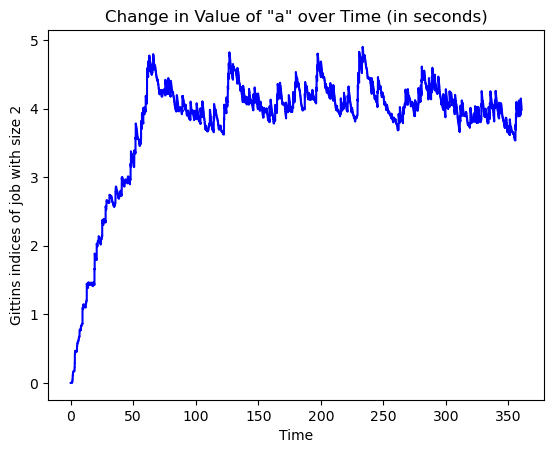

In [19]:
ans = np.zeros((6,4))
def pull():
    start_time = time.time()
    time_points = []
    a_values = []
    env = envir()
    agent = Agent(alpha=0.2,gamma=0.99,T=75000)
    trials = 3000
    agent.alpha = 0.2
    agent.gamma = 0.99
    agent.T = 75000
    Tmax = 75000
    Tmin = 0.25
    phi = 4
    for trial_no in tqdm(range(trials)):
        jobsize = env.getjob()
        s = np.array([1,1,1,1])
        while(s[0]!=0 or s[1]!=0 or s[2]!=0 or s[3]!=0):
                arm = agent.activate_task(s)
                action = arm
                s_curr = s.copy()
                next_state,reward = env.step(arm,s,jobsize)
                agent.update(s_curr,next_state,reward,arm)
                s = next_state
                current_time = time.time() - start_time
                time_points.append(current_time)
                a_values.append(agent.Q_values[34][0][34])
        agent.T = Tmin + 0.992*(agent.T - Tmin)
    
    jobsize = env.getjob()
    print(jobsize)
    s = np.array([1,1,1,1])
    while(s[0]!=0 or s[1]!=0 or s[2]!=0 or s[3]!=0):
            task = agent.testing(s)
            print(s)
            s_curr = s.copy()
            next_state,reward = env.step(task,s,jobsize)
            agent.update(s_curr,next_state,reward,task)
            s = next_state
            
    plt.plot(time_points,a_values, color='blue')
    plt.xlabel('Time')
    plt.ylabel('Gittins indices of job with size 2')
    plt.title('Change in Value of "a" over Time (in seconds)')
    plt.show()

    
pull()